# E-learning Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
df_names = ['courses', 'assessments', 'studentAssessment', 'studentRegistration']

In [26]:
adress='/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-fomenko-22/intermediate_project'
df_list=[]
for i in df_names:
    i = pd.read_csv (f'{adress}/{i}.csv')
    df_list.append(i)

In [27]:
courses = df_list[0]
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код).

module_presentation_length — продолжительность семестра в днях.

In [40]:
assessments = df_list[1]
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


Этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).

code_module — идентификационный код предмета.

code_presentation — семестр (Идентификационный код).

id_assessment — тест (Идентификационный номер ассессмента).

assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

In [29]:
studentAssessment = df_list[2]
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


id_assessment — тест (идентификационный номер).

id_student — идентификационный номер студента.

date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

In [31]:
studentRegistration = df_list[3]
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код)

id_student — идентификационный номер студента.

date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

In [33]:
#посмотрим на типы данных
for i in df_list:
    print (i.dtypes)
#все ок

code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object
code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object
id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object
code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object


In [35]:
#========================TASK 1================================================ 
#считаем число студентов, которые успешно прошли только один курс. 
#Считаем через успешные сдачи экзаменов по курсу у студентов, 
#где успешная сдача экзамена >=40% за экзамен,
#но данные по успешным экзаменам у нас есть только для курсов DDD и ССС
merged_assesments = assesments.merge (studentAssessment, how = 'inner', on='id_assessment') 
merged_assesments.query('assessment_type =="Exam"').code_module.nunique()
#данные есть только на 2 экзамена :(


2

In [36]:
#выбрать оценки за экзамен (type=Exam) из assesments
exam_assesments = assesments.query ('assessment_type =="Exam"')

# выбираем студентов в studentAssessment, получивших 40% или больше за тесты
positive_student_assesment = studentAssessment.query ('score>=40')

#исключим перезачеты, чтобы не получить лишних курсов
positive_student_assesment = positive_student_assesment.query ('is_banked!=1') 

#объединяем exam_assesments и positive_student_assesment по id_assesment, 
#чтобы получить успешные оценки за экзамен для каждого студента
ex_pos_stud_ass = positive_student_assesment.merge (exam_assesments, how = 'inner', on='id_assessment') 

In [37]:
#считаем по какому количеству уникальных курсов студент успешно сдал экзамен.
passed_courses = ex_pos_stud_ass.groupby('id_student', as_index=False).agg(passed_exams=('id_assessment','nunique'))

In [38]:
#считаем сколько учеников сдали экзамен/курс 1 раз
passed_courses.groupby('passed_exams',as_index=False)\
    .agg(total_students=('id_student','nunique'))\
    .query('passed_exams==1')
#3802 студентов успешно сдали только один курс (если считать среди курсов DDD и ССС)

,passed_exams,total_students
0,1,3802


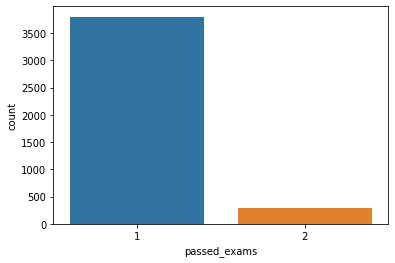

In [39]:
sns.countplot (data=passed_courses, x='passed_exams')

In [386]:
#ДОБАВЛЕНИЕ - можно исключить сдачи экзаменов, для которых дата сдачи (date_submitted) 
#превышает крайний срок сдачи (date) 
ex_pos_stud_ass_notlate = ex_pos_stud_ass\
    [(ex_pos_stud_ass['date'].isna())\
     |(ex_pos_stud_ass['date_submitted']<=ex_pos_stud_ass['date'])]

In [387]:
#в этом случае получаем на 6 учеников меньше. Они опоздали со сдачей экзамена, возможно он у них не защитался.
#Но лучше уточнить засчитывается ли подобным ученикам экзамены или нет
passed_courses1 = ex_pos_stud_ass_notlate.groupby('id_student', as_index=False)\
    .agg({'id_assessment':'nunique'})
passed_courses1.groupby('id_assessment',as_index=False)\
    .agg({'id_student':'nunique'})\
    .query('id_assessment==1')

,id_assessment,id_student
0,1,3796


In [362]:
#==========================TASK 2===============================================
#найти курсы и экзамены с наибольшей и наименьшей завершаемостью
#завершаемость для экзамена = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен
#если курс идёт в течение нескольких семестров, 
#будем считать сложность отдельно для каждого экзамена в конце семестра,
#т.е. если курс идет 2 семестра - посчитаем отдельно 2 сложности для 2 экзаменов

#сделали общую таблицу с оценками и информацией по курсам
merged_assesments = assesments.merge (studentAssessment, how = 'inner', on='id_assessment') 


In [364]:
#взяли оценки только по экзаменам
merged_exam_assesments = merged_assesments.query('assessment_type =="Exam"')

#исключили перезачеты
merged_assesments = merged_exam_assesments.query ('is_banked!=1') 


In [365]:
#посчитали сколько студентов пытались сдать экзамены для каждого курса
attempts_byexam = merged_exam_assesments.groupby(['id_assessment', 'code_module', 'code_presentation'], as_index=False)\
    .agg(total_attempts=('id_student','count')) 
attempts_byexam
#оказывается у нас есть данные только по 6 экзаменам и только для 2 курсов - ССС и DDD, 
#далее посчитаем выполнимость отдельно для каждого из 6 экзаменов и для каждого из 2 курсов (модулей)

,id_assessment,code_module,code_presentation,total_attempts
0,24290,CCC,2014B,747
1,24299,CCC,2014J,1168
2,25340,DDD,2013B,602
3,25354,DDD,2013J,968
4,25361,DDD,2014B,524
5,25368,DDD,2014J,950


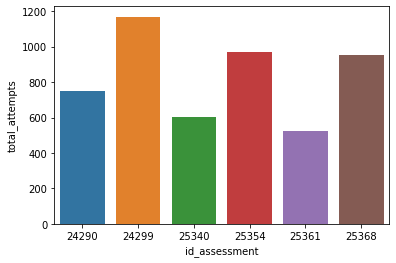

In [367]:
sns.barplot (x='id_assessment', y='total_attempts', data=attempts_byexam)

In [23]:
#выбрали успешные выполнения экзаменов
succ_exam_assesments = merged_exam_assesments.query('score >=40') 
succ_attempts_byexam = succ_exam_assesments.groupby(['id_assessment'], as_index=False)\
    .agg(succ_attempts=('id_student','count')) 


In [24]:
#объединили успешные попытки и все попытки
all_attempts_byexam = attempts_byexam.merge (succ_attempts_byexam, how = 'inner', on='id_assessment')

#посчитали выполнимость экзаменов (completion)
all_attempts_byexam['exam_completion'] =\
    all_attempts_byexam['succ_attempts']/all_attempts_byexam['total_attempts']

#Отсортировали экзамены по выполнимости
all_attempts_byexam = all_attempts_byexam.sort_values(by=['exam_completion']) 
all_attempts_byexam = all_attempts_byexam.reset_index(drop=True) 

#самый сложный экзамен
hardest_exam = all_attempts_byexam.id_assessment[0] 

#самый простой экзамен
easiest_exam = all_attempts_byexam.id_assessment[len(all_attempts_byexam.id_assessment)-1] 


In [25]:
print (f'The hardest exam id is {hardest_exam}. It is so hard, that only {round(all_attempts_byexam.exam_completion[0], 2)*100}% of students can pass it!')
print (f'The easiest exam id is {easiest_exam}. It is so easy, that {round(all_attempts_byexam.exam_completion[len(all_attempts_byexam.id_assessment)-1], 2)*100}% of students can pass it!')


The hardest exam id is 25340. It is so hard, that only 84.0% of students can pass it!
The easiest exam id is 25361. It is so easy, that 93.0% of students can pass it!


In [26]:
#посчитали завершаемость в целом для каждого курса (модуля)
by_module = all_attempts_byexam.groupby('code_module')\
    .agg(attempts_by_module=('total_attempts','sum'), succ_bymodule=('succ_attempts','sum'))
by_module['exam_completion'] = (by_module['succ_bymodule']/ by_module['attempts_by_module']).round(2)
by_module
#оказалось, что курс DDD проще, чем ССС

,attempts_by_module,succ_bymodule,exam_completion
code_module,,,
CCC,1915,1683,0.88
DDD,3044,2709,0.89


In [388]:
#==========================TASK_3===============================================
#считаем средний срок сдачи экзамена для каждого предмета
#сделали общую таблицу с оценками и информацией по курсам
merged_assesments = assesments.merge (studentAssessment, how = 'inner', on='id_assessment')

#выбрали экзамены
merged_exam_assesments = merged_assesments.query('assessment_type =="Exam"')

#исключили перезачеты
merged_assesments = merged_exam_assesments.query ('is_banked!=1') 

#выбираем успешные сдачи
succ_merged_assesments = merged_assesments.query('score>=40')

In [389]:
#считаем средний срок от начала семестра до успешной сдачи экзамена
exam_meantime = succ_merged_assesments.groupby(['id_assessment','code_module'], as_index=False)\
    .agg(mean_time=('date_submitted','mean')).round(2)
exam_meantime

,id_assessment,code_module,mean_time
0,24290,CCC,231.58
1,24299,CCC,244.40
2,25340,DDD,230.16
3,25354,DDD,239.51
4,25361,DDD,234.94
5,25368,DDD,242.80


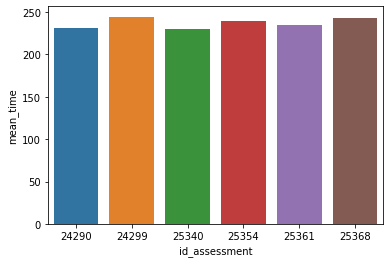

In [373]:
sns.barplot (x='id_assessment', y='mean_time', data=exam_meantime)

In [16]:
#считаем для каждого модуля
succ_merged_assesments.groupby('code_module').agg(mean_time=('date_submitted','mean')).round(2)

,mean_time
code_module,
CCC,239.35
DDD,237.98


In [27]:
#ДОБАВЛЕНИЕ 
#можно считать, что экзамены сданные после окончательной даты сдачи теста (date) не являются успешными, то:
#выбрали случаи, где крайнего срока для сдачи экзамена нет или дата сдачи не превысила крайний срок
deadlines = succ_merged_assesments\
    [(succ_merged_assesments['date'].isna())\
     |(succ_merged_assesments['date_submitted']<=succ_merged_assesments['date'])]

# в этом случае средние сроки сдачи чуть меньше
deadlines.groupby(['id_assessment','code_module'])\
    .agg(mean_time=('date_submitted','mean')).round(2)

,,mean_time
id_assessment,code_module,
24290,CCC,231.58
24299,CCC,244.40
25340,DDD,230.10
25354,DDD,239.51
25361,DDD,234.87
25368,DDD,242.80


In [390]:
#==========================TASK_4===============================================
#ТОП-3 курсов по количеству регистраций
#сгруппируем регистрации по курсу, посчитаем число студентов,
#так как студенты могут регистрироваться на курсы повторно в следующих семестрах, берем метод count, а не nunique
#исключим студентов которые вышли с курса раньше, чем он начался (их уход не зависит от качества курса)
filtStudReg = studentRegistration\
    .query('date_unregistration >= 0 or date_unregistration != date_unregistration')
reg_students_bymodule = filtStudReg\
    .groupby('code_module')\
    .agg(registered_students=('id_student','count'))\
    .sort_values(by='registered_students', ascending=False)
reg_students_bymodule.head(3)

,registered_students
code_module,
FFF,7188
BBB,7052
DDD,5756


In [391]:
#и отдельно для каждого семестра
reg_students_bysem = studentRegistration\
    .query('date_unregistration >= 0 or date_unregistration != date_unregistration')\
    .groupby(['code_module','code_presentation'])\
    .agg(registered_students=('id_student','count'))\
    .sort_values(by='registered_students', ascending=False)
reg_students_bysem.head(3)

registered_students
code_module code_presentation                     
CCC         2014J                             2285
FFF         2014J                             2170
            2013J                             2112

In [392]:
#ТОП-3 по абсолютному оттоку (абсолютное число студентов покинувших курс до окончания)
unreg = filtStudReg [filtStudReg['date_unregistration'].notna()]
unreg_bymodule = unreg.groupby('code_module').agg(unreg_students=('id_student','count'))\
    .sort_values(by='unreg_students', ascending=False)
unreg_bymodule.head(3)
#Но абсолютный отток не совсем объективно отражает ситуацию (чем больше на курс записалось - тем больше и отпишется)
#поэтому дополнительно посчитаем относительный отток 

,unreg_students
code_module,
FFF,1806
DDD,1719
BBB,1520


In [394]:
#ТОП-3 по относительному оттоку 
#отношение числа покинувших курс до окончания к общему числу записавшихся на курс
reg_unreg = reg_students_bymodule.merge (unreg_bymodule, how='inner', on='code_module')
reg_unreg['unreg_percent']=round(reg_unreg['unreg_students']*100 / reg_unreg['registered_students'], 2)
top3_unreg_percent = reg_unreg.sort_values(by='unreg_percent', ascending=False).head(3)
top3_unreg_percent 


,registered_students,unreg_students,unreg_percent
code_module,,,
CCC,3971,1484,37.37
DDD,5756,1719,29.86
FFF,7188,1806,25.13


In [ ]:
#==========================TASK_5===============================================
# Напиши функцию на python, позволяющую строить когортный (семестровый) анализ. 
#В период с начала 2013 по конец 2014 выяви 
#семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов. 
#для простоты будем считать, что 2013B - осенний семестр 2013, а 2014J - весенний семестр 2014
#Считаем, что все студенты, которые обучаются в семестре буду считаться отдельной когортой (таким образом студент может оказаться в нескольких когортах одновременно)

In [4]:
merged_assesments = assesments.merge (studentAssessment, how = 'inner', on='id_assessment')\
    .query ('is_banked == 0')

In [23]:
#df - датафрейм с данными
#metrics - метрики, которые нужно посчитать
#first_sem, last_sem - диапазон семестров
#метрики расчитываем как в прошлых заданиях
def cohort (df, metrics, first_sem, last_sem):
    filtered = df\
        .query('code_presentation>=@first_sem & code_presentation<=@last_sem')\
        .query('assessment_type =="Exam"')
    filtered['is_succ']=(filtered['score']>=40)*1
    result = []
    if 'mean_time' in metrics:
        mean_time = filtered\
            .query('is_succ==1')\
            .groupby('code_presentation', as_index=False)\
            .agg(mean_time=('date_submitted','mean')).round(2)
        mean_time = mean_time.sort_values(by='mean_time')
        result.append(mean_time)
    if 'completion' in metrics:
        comp = filtered\
            .groupby('code_presentation', as_index=False)\
            .agg(total_students=('id_student','nunique'), succ_students=('is_succ','sum'))
        comp['completion']=round(comp['succ_students']*100/comp['total_students'],2)
        comp = comp.sort_values(by='completion')
        result.append(comp)
    return result

In [21]:
cohort_result = cohort (merged_assesments,['mean_time','completion'],'2013B','2014J')
cohort_result[0]
#2014J - семестр с наиболее длительной средней сдачей курсов

,code_presentation,mean_time
0,2013B,230.16
2,2014B,233.00
1,2013J,239.51
3,2014J,243.68


In [24]:
cohort_result[1]
#2013B - семестр с самой низкой завершаемостью

,code_presentation,total_students,succ_students,completion
0,2013B,602,504,83.72
3,2014J,2118,1861,87.87
2,2014B,1271,1149,90.40
1,2013J,968,878,90.70


In [ ]:
#==========================================================TASK 6=============================================================
#RFM-анализ, где:
#R - среднее время сдачи одного экзамена, 
#F - завершаемость курсов, 
#M - среднее количество баллов, получаемое за экзамен. 

In [5]:
#Подготовим данные
merged_assesments['is_succ']=(merged_assesments['score']>=40)*1
RFM_df = merged_assesments\
    .query('assessment_type =="Exam" and is_banked==0')\
    .groupby('id_student', as_index=False)\
    .agg(mean_exam_time=('date_submitted','mean'), all_exams=('id_assessment','nunique')\
         , successful_exams=('is_succ','sum'), mean_exam_score=('score','mean'))
RFM_df['exam_completeness_percent']=(RFM_df['successful_exams']*100/RFM_df['all_exams'])

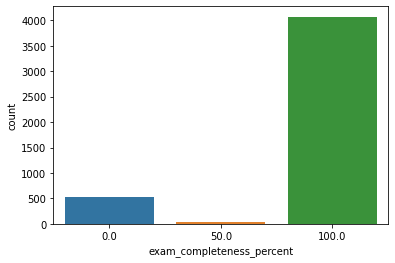

In [6]:
#F - завершаемость курсов
sns.countplot(data=RFM_df, x='exam_completeness_percent')
#по завершаемости (F) разделим учеников на 3 группы:
#0 - ни одной успешной сдачи, 1 - 50% успешных сдач, 2 - 100% успешных сдачи

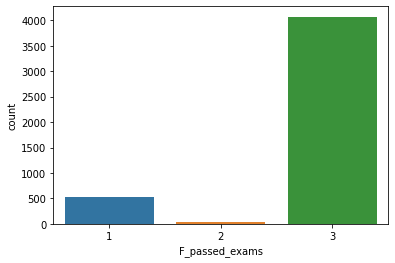

In [7]:
RFM_df['F_passed_exams']=pd.cut\
    (RFM_df['exam_completeness_percent'], 3, labels=[1, 2, 3])
sns.countplot(data=RFM_df, x='F_passed_exams')

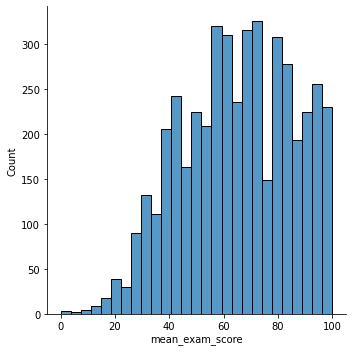

In [8]:
#M - среднее количество баллов, получаемое за экзамен
sns.displot(data=RFM_df, x='mean_exam_score')

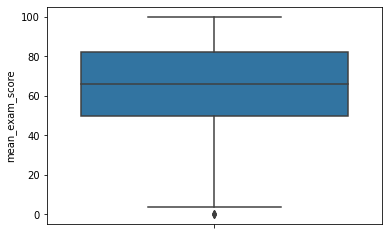

In [9]:
sns.boxplot(data=RFM_df, y='mean_exam_score')


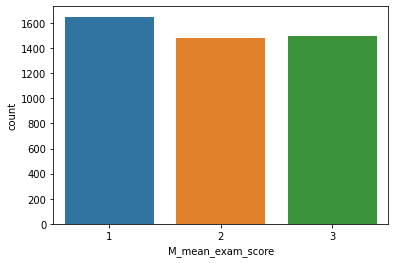

In [10]:
#порежем метрику по терцилям, чем больше баллов, тем выше значение M
RFM_df['M_mean_exam_score'] = pd.qcut\
    (RFM_df['mean_exam_score'], q=3, labels=['1', '2', '3'])
sns.countplot(data=RFM_df, x='M_mean_exam_score')

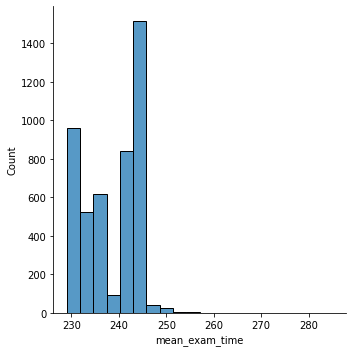

In [11]:
#R - среднее время сдачи одного экзамена
sns.displot(data=RFM_df, x='mean_exam_time', bins=20)

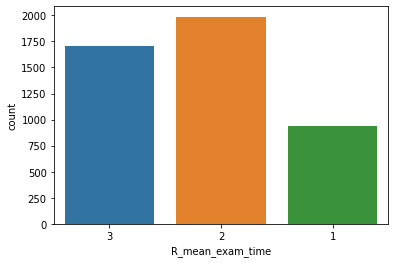

In [12]:
#порежем метрику по терцилям, при этом чем быстрее был сдан экзамен, тем выше значение R в RFM
RFM_df['R_mean_exam_time']=pd.qcut\
    (RFM_df['mean_exam_time'], 3, labels=[3, 2, 1]) 
sns.countplot(data=RFM_df, x='R_mean_exam_time')

In [14]:
RFM_only=RFM_df[['id_student','F_passed_exams','R_mean_exam_time','M_mean_exam_score']]

In [15]:
#функция для расчета RFM
def RFM_calculator(row):
    return str(row['R_mean_exam_time']) + str(row['F_passed_exams']) + str(row['M_mean_exam_score'])

In [16]:
RFM_only['RFM_score']=\
    RFM_only.apply(RFM_calculator, axis=1)
RFM_only.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id_student,F_passed_exams,R_mean_exam_time,M_mean_exam_score,RFM_score
0,23698,3,2,3,233
1,24213,3,3,2,332
2,27116,3,2,3,233
3,28046,3,2,1,231
4,28787,3,2,1,231


In [209]:
#очень кривое создание RFM-таблицы для heatmap графика, 
#уверен, что можно сделать проще, но не знаю как :(
F = RFM_only.groupby('F_passed_exams')\
    .agg(F_passed_exams=('id_student','count'))
Ftr = F.transpose()
R = RFM_only.groupby('R_mean_exam_time')\
    .agg(R_mean_exam_time=('id_student','count'))
Rtr = R.transpose()
M = RFM_only.groupby('M_mean_exam_score')\
    .agg(M_mean_exam_score=('id_student','count'))
Mtr = M.transpose()
Mtr.columns = [1,2,3]
FR = pd.concat ([Ftr, Rtr], axis=0)
RFM = pd.concat ([FR, Mtr], axis=0)
RFM.columns = ['bad','average','good']

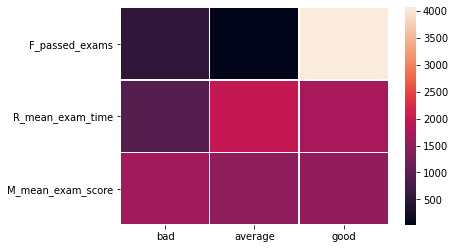

In [207]:
#визуализация отдельных R, F, M групп
sns.heatmap (RFM,linewidths=.5)

In [138]:
#границы для кластеров по терцилям
R_33 = round (RFM_df['mean_exam_time'].quantile(0.33))
R_66 = round (RFM_df['mean_exam_time'].quantile(0.66))
M_33 = round (RFM_df['mean_exam_score'].quantile(0.33))
M_66 = round (RFM_df['mean_exam_score'].quantile(0.66))

In [139]:
#Добавим описание к кластерам
description=[]
for i in RFM_only['RFM_score']:
    R=''
    F=''
    M=''
    if i[0]=='1':
        R=(f'slow (>{R_66} days)')
    elif i[0]=='2':
        R=(f'{R_66}-{R_33} days')
    elif i[0]=='3':
        R=(f'fast (<{R_33} days)')
    if i[1]=='1':
        F=('0% passed')
    elif i[1]=='2':
        F=('50% passed')
    elif i[1]=='3':
        F=('100% passed')
    if i[2]=='1':
        M=(f'score <{M_33}')
    elif i[2]=='2':
        M=(f'score {M_33}-{M_66}')
    elif i[2]=='3':
        M=(f'score >{M_66}')
    row=(R+', '+F+', '+M)
    description.append(row)
RFM_only['cluster_description']=description
RFM_only

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id_student,F_passed_exams,R_mean_exam_time,M_mean_exam_score,RFM_score,cluster_description
0,23698,3,2,3,233,"243-236 days, 100% passed, score >76"
1,24213,3,3,2,332,"fast (<236 days), 100% passed, score 56-76"
2,27116,3,2,3,233,"243-236 days, 100% passed, score >76"
3,28046,3,2,1,231,"243-236 days, 100% passed, score <56"
4,28787,3,2,1,231,"243-236 days, 100% passed, score <56"
...,...,...,...,...,...,...
4628,2694886,3,3,2,332,"fast (<236 days), 100% passed, score 56-76"
4629,2694933,3,3,2,332,"fast (<236 days), 100% passed, score 56-76"
4630,2695608,3,2,2,232,"243-236 days, 100% passed, score 56-76"
4631,2697181,3,3,3,333,"fast (<236 days), 100% passed, score >76"


In [378]:
RFM_result = RFM_only\
    .groupby(['RFM_score','cluster_description'], as_index=False)\
    .agg(total_students=('id_student','nunique'))\
    .sort_values(by='total_students', ascending=False)
RFM_result

,RFM_score,cluster_description,total_students
8,232,"243-236 days, 100% passed, score 56-76",693
9,233,"243-236 days, 100% passed, score >76",586
15,333,"fast (<236 days), 100% passed, score >76",546
14,332,"fast (<236 days), 100% passed, score 56-76",541
7,231,"243-236 days, 100% passed, score <56",473
13,331,"fast (<236 days), 100% passed, score <56",408
4,133,"slow (>243 days), 100% passed, score >76",369
3,132,"slow (>243 days), 100% passed, score 56-76",247
5,211,"243-236 days, 0% passed, score <56",217
2,131,"slow (>243 days), 100% passed, score <56",206


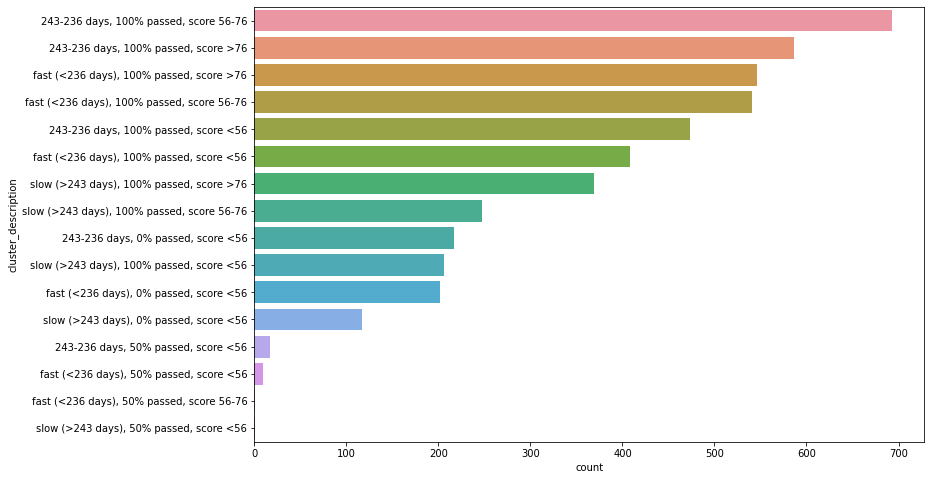

In [380]:
plt.figure(figsize=(12, 8))
sns.countplot(y = 'cluster_description', data = RFM_only, order = RFM_only['cluster_description'].value_counts().index)

In [ ]:
#ВЫВОДЫ И РЕКОМЕНДАЦИИ
# у нас мало студентов, которые сдали часть экзаменов. Либо студенты сдают оба экзамена, либо не сдают их вообще
# в целом, учат в нашей школе неплохо - большая часть студентов успешно сдаёт экзамены
# успешность сдачи экзамена и балл за него не сильно зависит от скорости сдачи экзамена (чтобы выяснить точно нужно построить регрессию)
# у студентов из кластеров N11 большие проблемы с учебой, нужно рекламировать им личные занятия с ментором/помощь на следующих курсах, предложить повторное прохождение курса
# кластер 333 и 233 - наиболее успешные студенты, им можно предлагать более сложные курсы и задания, приглашать на стажировки

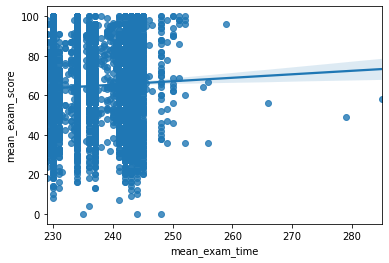

In [375]:
# Судя по размерам кластеров в RFM-анализе длительность сдачи экзамена и балл за него не особо связаны
#по крайней мере линейной зависимости между ними не наблюдается (точнее сказать сможет регрессия)
sns.regplot (data=RFM_df, x='mean_exam_time', y='mean_exam_score')